# ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<h1><center> Analysis of Fiber Internet (FTTH) Accessiable Population of Myanmar
</center></h1>

In [1]:
# Ooredoo coverage cities and towns
import pandas as pd
pd.set_option('display.max_rows', None) # display all rows of a dataframe
ooredoo = "Hinthada, Hsipaw, Kalaw, Kyaikto, Kyaukpadaung, Kyaukse, Lashio, Meiktila, Mogok, Mudon, Myingyan, Pyinmana, Nyaung-U, Nyaungshwe, Pathein, Pyay, Pyin Oo Lwin, Shwebo, Tachileik, Tangyan, Taungoo, Taunggyi, Thanbyuzayat, Thaton, Ye"
# Telenor coverage cities and towns
telenor = "Pathein, Hinthada, Yangon, Mandalay, Pathein Gyi, Amarapura, Pyin Oo Lwin, Myitkyina, Myingyan, Kyaukse, Mogok, Meiktila, Kyaukpadaung, Pyinmana"
# MPT coverage cities and towns
mpt = "Yangon, Mandalay, Meiktila, Mogok, Amarapura, Yamethin, Kyaukse, Madaya, Pathein Gyi, Pyawbwe, Monywa, Kanbalu, Sagaing, Shwebo, Ye-U, Kawlin, Kalay, Tamu,Htigyaing, Kawthaung, Myeik, Dawei, Palaw, Launglon, Thayetchaung, Taunggyi, Kalaw, Nansang, Muse, Kyaukme, Kengtung, Aungpan, Loilem, Nyaungshwe, Ayetharyar, Tachileik, Lashio, Hopin, Shwenyaung, Hsipaw, Mong Hsat, Nawnghkio, Bago, Gyobingauk, Taungoo, Pyu, Pyay, Naypyidaw, Pyinmana, Hpa-An, Myawaddy, Hlaingbwe, Mawlamyine, Ye, Thanbyuzayat, Pathein, Hinthada, Myaungmya, Nyaungdon, Loikaw, Hakha, Myitkyina, Bhamo, Mogaung, Mohnyin, Seikmu, Hpakant, Sittwe, Kyaukpyu, Aunglan, Chauk, Pakokku, Gangaw, Magway, Kutkai"
ooredoo = ooredoo.split(',')
telenor = telenor.split(',')
mpt = mpt.split(',')
ooredoo = [i.strip() for i in ooredoo]
telenor = [i.strip() for i in telenor]
mpt = [i.strip() for i in mpt]
# Total cities and towns of coverage
coverage = ooredoo + telenor + mpt
coverage = sorted(set(coverage), key= str.lower)
print("{} \n {}".format(coverage,len(coverage)))

['Amarapura', 'Aunglan', 'Aungpan', 'Ayetharyar', 'Bago', 'Bhamo', 'Chauk', 'Dawei', 'Gangaw', 'Gyobingauk', 'Hakha', 'Hinthada', 'Hlaingbwe', 'Hopin', 'Hpa-An', 'Hpakant', 'Hsipaw', 'Htigyaing', 'Kalaw', 'Kalay', 'Kanbalu', 'Kawlin', 'Kawthaung', 'Kengtung', 'Kutkai', 'Kyaikto', 'Kyaukme', 'Kyaukpadaung', 'Kyaukpyu', 'Kyaukse', 'Lashio', 'Launglon', 'Loikaw', 'Loilem', 'Madaya', 'Magway', 'Mandalay', 'Mawlamyine', 'Meiktila', 'Mogaung', 'Mogok', 'Mohnyin', 'Mong Hsat', 'Monywa', 'Mudon', 'Muse', 'Myaungmya', 'Myawaddy', 'Myeik', 'Myingyan', 'Myitkyina', 'Nansang', 'Nawnghkio', 'Naypyidaw', 'Nyaung-U', 'Nyaungdon', 'Nyaungshwe', 'Pakokku', 'Palaw', 'Pathein', 'Pathein Gyi', 'Pyawbwe', 'Pyay', 'Pyin Oo Lwin', 'Pyinmana', 'Pyu', 'Sagaing', 'Seikmu', 'Shwebo', 'Shwenyaung', 'Sittwe', 'Tachileik', 'Tamu', 'Tangyan', 'Taunggyi', 'Taungoo', 'Thanbyuzayat', 'Thaton', 'Thayetchaung', 'Yamethin', 'Yangon', 'Ye', 'Ye-U'] 
 83


In [2]:
# Population data is collected from wikipedia website
url = "https://en.wikipedia.org/wiki/List_of_cities_and_largest_towns_in_Myanmar"
infotable = pd.read_html(url, flavor = 'bs4')
# The default parser is 'lxml' but there is a slower but more accurate parser - bs4(BeautifulSoup) parser.
# read_html() return list of dataframes even though there is only one dataframe.
cities = infotable[0]
towns = infotable[1]

# In wiki page, Kengtung includes two entries in towns table and decide to drop one with '2014 Census' column is 9991 value in towns
towns.drop(towns[(towns['Town'] == "Kengtung") & (towns['2014 Census'] == 9991)].index, inplace = True)

# Coverage cities and towns list
coverage_cities = [cov for cov in cities['City'] if cov in coverage]
coverage_towns = [cov for cov in towns['Town'] if cov in coverage]
coverage_cities_towns = coverage_cities + coverage_towns
coverage_cities_towns = sorted(coverage_cities_towns, key= str.lower)

In [ ]:
coverage_cities_towns

In [ ]:
print(len(coverage_cities)) # 25
print(len(coverage_towns)) # 53

25
53


In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Rank                                                33 non-null     int64 
 1   City                                                33 non-null     object
 2   State/Region                                        33 non-null     object
 3   2014 Census (2019 Estimate) [clarification needed]  33 non-null     int64 
 4   1993 Estimate                                       33 non-null     int64 
 5   Change                                              33 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.7+ KB


In [5]:
towns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 238
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           237 non-null    float64
 1   Town           238 non-null    object 
 2   State/Region   238 non-null    object 
 3   2014 Census    238 non-null    int64  
 4   1993 Estimate  238 non-null    int64  
 5   Change         238 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 13.0+ KB


In [6]:
cities.rename({"2014 Census (2019 Estimate) [clarification needed]": "Population"}, axis="columns", inplace = True)
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           33 non-null     int64 
 1   City           33 non-null     object
 2   State/Region   33 non-null     object
 3   Population     33 non-null     int64 
 4   1993 Estimate  33 non-null     int64 
 5   Change         33 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.7+ KB


In [7]:
towns.rename({"2014 Census": "Population"}, axis="columns", inplace = True)
towns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 238
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           237 non-null    float64
 1   Town           238 non-null    object 
 2   State/Region   238 non-null    object 
 3   Population     238 non-null    int64  
 4   1993 Estimate  238 non-null    int64  
 5   Change         238 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 13.0+ KB


In [8]:
# filter the Dataframes for coverage cities and towns
coverage_cities = cities[cities['City'].isin(coverage_cities)]
coverage_towns = towns[towns['Town'].isin(coverage_towns)]
# print(coverage_cities)
# print(coverage_towns)
coverage_cities.reset_index(drop=True, inplace=True) # reset index from 0
coverage_towns.reset_index(drop=True, inplace=True) # reset index from 0
# print("{} \n {}".format(coverage_cities_towns,len(coverage_cities_towns)))

In [9]:
# check whether wiki listed cities and towns contains coverage list or not
# non_coverage = [non_cov for non_cov in coverage_cities['City'] if non_cov not in coverage]
# non_coverage += [non_cov for non_cov in coverage_towns['Town'] if non_cov not in coverage]
# print(non_coverage)

# 'coverage' list from 3 Telecom operators and 'coverage_cities_towns' list from wiki are compared.
error_check = set(coverage).difference(set(coverage_cities_towns))
print(error_check)

{'Pathein Gyi', 'Seikmu', 'Ayetharyar', 'Shwenyaung', 'Amarapura'}


In [10]:
# Calculate population of coverage cities and towns
coverage_population = coverage_cities['Population'].sum() + coverage_towns['Population'].sum()
# Population of five towns is calculated via arcgis and raster data is collected from www.worldpop.org
Seikmu_population = 25321
Amarapura_population = 177247
Ayetharyar_population = 84973
Patheingyi_population = 113463
Shwenyaung_population = 19918
coverage_population += Seikmu_population + Amarapura_population + Ayetharyar_population + Patheingyi_population + Shwenyaung_population
coverage_population_M = coverage_population/1000000
"{} Millions of Myanmar people are currently accessible to Fiber Internet.".format(coverage_population_M)

'12.194723 Millions of Myanmar people are currently accessible to Fiber Internet.'

In [11]:
total_population_M = 53.8 # source from google
inaccessible = total_population_M - coverage_population_M

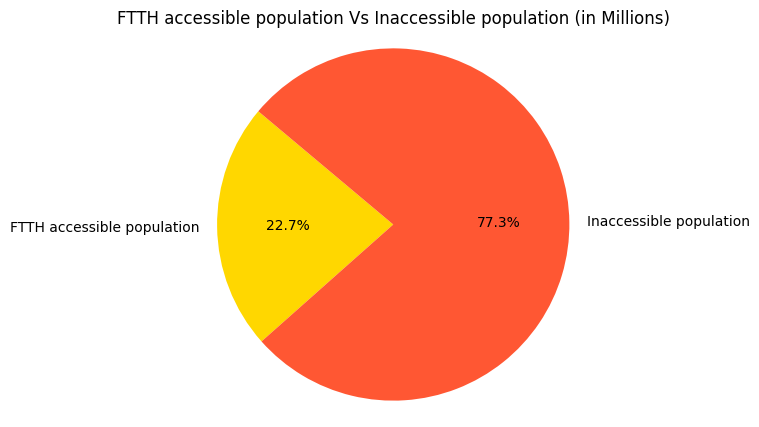

In [12]:
import matplotlib.pyplot as plt
# Data to be represented in the pie chart
labels = ['FTTH accessible population', 'Inaccessible population']
sizes = [coverage_population_M, inaccessible]  # Sizes or proportions for each category
colors = ['gold', '#FF5733']  # Colors for each category

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('FTTH accessible population Vs Inaccessible population (in Millions)')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()